In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Datasets/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

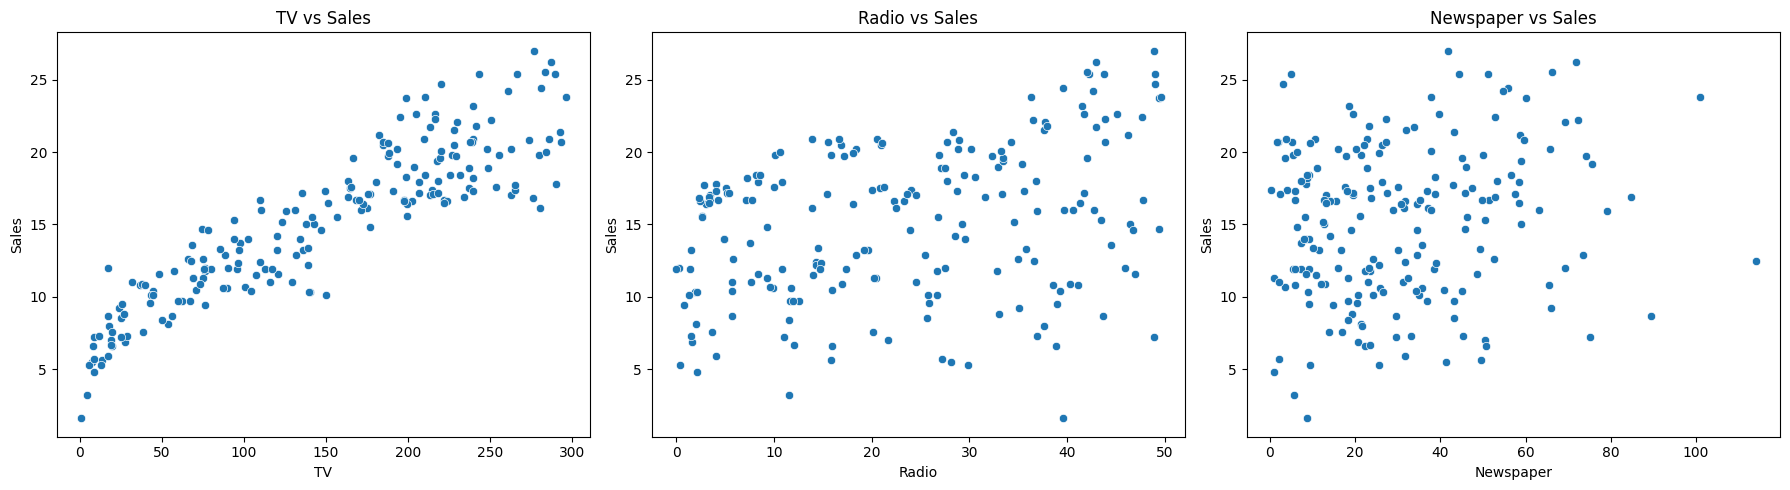

In [8]:
plt.figure(figsize=(18, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X = df[['TV']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6.101072906773963
R² Score: 0.802561303423698


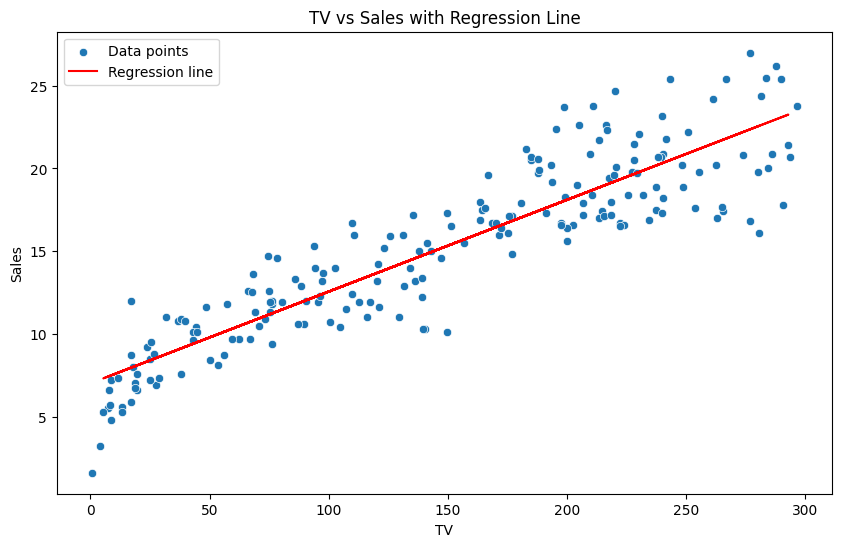

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df, label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('TV vs Sales with Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [18]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'sales_prediction_lr_model.pkl')

['sales_prediction_lr_model.pkl']

In [20]:
import tkinter as tk
from tkinter import messagebox

# Load the saved model
model = joblib.load('sales_prediction_lr_model.pkl')

# Function to predict sales
def predict_sales():
    try:
        tv_advertising = float(tv_entry.get())
        # Create DataFrame with the same column name as used in training
        input_data = pd.DataFrame([[tv_advertising]], columns=['TV'])
        prediction = model.predict(input_data)
        result_label.config(text=f"Predicted Sales: ${prediction[0]:.2f}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid number for TV advertising.")

# Create the main window
root = tk.Tk()
root.title("Sales Prediction Guide")

# Set window size
root.geometry("400x250")

# Create and place widgets with padding
tk.Label(root, text="TV Advertising ($):", font=("Arial", 12)).pack(pady=(20, 10))
tv_entry = tk.Entry(root, font=("Arial", 12))
tv_entry.pack(pady=(0, 20))

predict_button = tk.Button(root, text="Predict Sales", command=predict_sales, font=("Arial", 12))
predict_button.pack(pady=(10, 20))

result_label = tk.Label(root, text="Predicted Sales: $0.00", font=("Arial", 12))
result_label.pack(pady=(10, 20))

# Run the application
root.mainloop()
